In [3]:
# plot sph-exa results (linux "nteract" notebook)
import json
import pandas as pd

In [4]:
jsonfile = '/tmp/JG/PLOT/EIGER/ptl_eiger_OK_cce+gnu.json'
f = open(jsonfile)
d = json.load(f)
f.close()

In [5]:
dd = d['runs'][0]['testcases']
dd[0].keys()

dict_keys(['build_stderr', 'build_stdout', 'dependencies_actual', 'dependencies_conceptual', 'description', 'environment', 'fail_phase', 'fail_reason', 'jobid', 'job_stderr', 'job_stdout', 'maintainers', 'name', 'nodelist', 'outputdir', 'perfvars', 'result', 'stagedir', 'scheduler', 'system', 'tags', 'time_compile', 'time_performance', 'time_run', 'time_sanity', 'time_setup', 'time_total'])

In [6]:
job = 0
dd[job]['name'].split('_')

['sphexa', 'ptlbug', 'sedov', '128mpi', '001omp', '337n', '1steps']

In [8]:
dd[job+2]['name'].split('_')

['sphexa', 'ptlbug', 'sedov', '256mpi', '001omp', '425n', '1steps']

In [14]:
mpiL = [] ;ompL = [] ;sideL = [] ;stepL = [] ;commitL = [] ;peL = []
elapsedL = [] ;unitL = []
aL = [];bL = [];cL = [];dL = [];eL = [];fL = [];gL = [];hL = [];iL = []
jL = [];kL = [];lL = [];mL = [];nL = [];oL = []
job = 0
name = dd[job]['name'].split('_')
mpiL.append(int(name[3].replace('mpi', '')))
ompL.append(int(name[4].replace('omp', '')))
sideL.append(int(name[5].replace('n', '')))
stepL.append(int(name[6].replace('steps', '')))
# commitL.append(name[7])
commitL.append('#')
pe = dd[job]['environment']
peL.append(pe)
print(f'{name}\n mpiL={mpiL}\n ompL={ompL}\n sideL={sideL}\n stepL={stepL}\n commitL={commitL}\n pe={pe}\n peL={peL}\n')

['sphexa', 'ptlbug', 'sedov', '128mpi', '001omp', '337n', '1steps']
 mpiL=[128]
 ompL=[1]
 sideL=[337]
 stepL=[1]
 commitL=['#']
 pe=PrgEnv-cray
 peL=['PrgEnv-cray']



In [10]:
for i in range(len(dd[job]['perfvars'])):
  print(i, dd[job]['perfvars'][i]['name'])

0 Elapsed
1 _Elapsed
2 domain_distribute
3 mpi_synchronizeHalos
4 BuildTree
5 FindNeighbors
6 Density
7 EquationOfState
8 IAD
9 MomentumEnergyIAD
10 Timestep
11 UpdateQuantities
12 EnergyConservation
13 SmoothingLength
14 %MomentumEnergyIAD
15 %Timestep
16 %mpi_synchronizeHalos
17 %FindNeighbors
18 %IAD
19 patrun_cn
20 ptl_high_mem
21 ptl_high_mem_c
22 %patrun_user
23 %patrun_mpi
24 %patrun_etc
25 %patrun_total
26 %patrun_user_slowest
27 %patrun_mpi_slowest
28 %patrun_etc_slowest
29 %patrun_user_fastest
30 %patrun_mpi_fastest
31 %patrun_etc_fastest
32 %patrun_avg_usr_reported
33 %patrun_avg_mpi_reported
34 %patrun_avg_etc_reported
35 %patrun_hotspot1
36 %patrun_mpi_h1
37 %patrun_mpi_h1_imb
38 patrun_avg_energy
39 patrun_avg_power


In [11]:
for job in range(len(dd)):
  if dd[job]['outputdir'] is None:
    print(job, dd[job]['outputdir'])

In [13]:
# 20 %scorep_USR
# 21 %scorep_MPI

#19 patrun_cn
#22 %patrun_user
#23 %patrun_mpi
#24 %patrun_etc

#32 %patrun_avg_usr_reported
#33 %patrun_avg_mpi_reported
#34 %patrun_avg_etc_reported

#38 patrun_avg_energy
#39 patrun_avg_power

dd[job]['perfvars'][38]['name']

'patrun_avg_energy'

In [15]:
mpiL = [] ;ompL = [] ;sideL = [] ;stepL = [] ;commitL = [] ;peL = []
elapsedL = [] ;unitL = []
aL = [];bL = [];cL = [];dL = [];eL = [];fL = [];gL = [];hL = [];iL = []
jL = [];kL = [];lL = [];mL = [];nL = [];oL = []
for job in range(len(dd)):
    name = dd[job]['name'].split('_')
    mpiL.append(int(name[3].replace('mpi', '')))
    ompL.append(int(name[4].replace('omp', '')))
    sideL.append(int(name[5].replace('n', '')))
    stepL.append(int(name[6].replace('steps', '')))
    # commitL.append(name[7])
    commitL.append('#')
    pe = dd[job]['environment']
    peL.append(pe)
    # {'name': '_Elapsed', 'reference': 0, 'thres_lower': None, 'thres_upper': None, 'unit': 's', 'value': 8}
    if dd[job]['outputdir'] is None:
        # failed = no perfvars
        elapsedL.append(0)
        aL.append(0)
        bL.append(0)
        cL.append(0)
        dL.append(0)
        eL.append(0)
        fL.append(0)
        gL.append(0)
        hL.append(0)
        iL.append(0)
        jL.append(0)
        kL.append(0)
        lL.append(0)
        mL.append(0)
        nL.append(0)
    else:        
        for metric in range(len(dd[job]['perfvars'])):
            if dd[job]['perfvars'][metric]['name'] == 'Elapsed': elapsedL.append(dd[job]['perfvars'][metric]['value'])
            if dd[job]['perfvars'][metric]['name'] == 'domain_distribute': aL.append(dd[job]['perfvars'][metric]['value'])
            if dd[job]['perfvars'][metric]['name'] == 'mpi_synchronizeHalos': bL.append(dd[job]['perfvars'][metric]['value'])
            if dd[job]['perfvars'][metric]['name'] == 'BuildTree': cL.append(dd[job]['perfvars'][metric]['value'])
            if dd[job]['perfvars'][metric]['name'] == 'FindNeighbors': dL.append(dd[job]['perfvars'][metric]['value'])
            if dd[job]['perfvars'][metric]['name'] == 'Density': eL.append(dd[job]['perfvars'][metric]['value'])
            if dd[job]['perfvars'][metric]['name'] == 'EquationOfState': fL.append(dd[job]['perfvars'][metric]['value'])
            if dd[job]['perfvars'][metric]['name'] == 'IAD': gL.append(dd[job]['perfvars'][metric]['value'])
            if dd[job]['perfvars'][metric]['name'] == 'MomentumEnergyIAD': hL.append(dd[job]['perfvars'][metric]['value'])
            if dd[job]['perfvars'][metric]['name'] == 'Timestep': iL.append(dd[job]['perfvars'][metric]['value'])
            if dd[job]['perfvars'][metric]['name'] == 'UpdateQuantities': jL.append(dd[job]['perfvars'][metric]['value'])
            if dd[job]['perfvars'][metric]['name'] == 'EnergyConservation': kL.append(dd[job]['perfvars'][metric]['value'])
            if dd[job]['perfvars'][metric]['name'] == 'SmoothingLength': lL.append(dd[job]['perfvars'][metric]['value'])
            # unitL.append(dd[job]['perfvars'][metric]['unit'])
            # scorep: 20 %scorep_USR / 21 %scorep_MPI
            # if dd[job]['perfvars'][metric]['name'] == '%scorep_USR': mL.append(dd[job]['perfvars'][metric]['value'])
            # if dd[job]['perfvars'][metric]['name'] == '%scorep_MPI': nL.append(dd[job]['perfvars'][metric]['value'])

In [16]:
df_dict = {'mpi': mpiL, 'openmp': ompL, 'cubeside': sideL, 'steps': stepL,
           'gitcommit': commitL, 'pe': peL, 'elapsed': elapsedL,
           'domain_distribute': aL, 'mpi_synchronizeHalos': bL, 'BuildTree': cL,
           'FindNeighbors': dL, 'Density': eL, 'EquationOfState': fL,
           'IAD': gL, 'MomentumEnergyIAD': hL, 'Timestep': iL, 'UpdateQuantities': jL,
           'EnergyConservation': kL, 'SmoothingLength': lL,
           }  # , 'unit': unitL}
# print(mpiL, ompL, sideL, stepL, peL)
df_dict.keys()

dict_keys(['mpi', 'openmp', 'cubeside', 'steps', 'gitcommit', 'pe', 'elapsed', 'domain_distribute', 'mpi_synchronizeHalos', 'BuildTree', 'FindNeighbors', 'Density', 'EquationOfState', 'IAD', 'MomentumEnergyIAD', 'Timestep', 'UpdateQuantities', 'EnergyConservation', 'SmoothingLength'])

In [17]:
df_dict_keys = list(df_dict.keys())
df_dict_keys

['mpi',
 'openmp',
 'cubeside',
 'steps',
 'gitcommit',
 'pe',
 'elapsed',
 'domain_distribute',
 'mpi_synchronizeHalos',
 'BuildTree',
 'FindNeighbors',
 'Density',
 'EquationOfState',
 'IAD',
 'MomentumEnergyIAD',
 'Timestep',
 'UpdateQuantities',
 'EnergyConservation',
 'SmoothingLength']

In [18]:
for k in df_dict_keys:
  print(k, df_dict[k], len(df_dict[k]))

mpi [128, 128, 256, 256, 512, 512, 1024, 1024, 2048, 2048, 4096, 4096] 12
openmp [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] 12
cubeside [337, 337, 425, 425, 535, 535, 674, 674, 850, 850, 1071, 1071] 12
steps [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] 12
gitcommit ['#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#'] 12
pe ['PrgEnv-cray', 'PrgEnv-gnu', 'PrgEnv-cray', 'PrgEnv-gnu', 'PrgEnv-cray', 'PrgEnv-gnu', 'PrgEnv-cray', 'PrgEnv-gnu', 'PrgEnv-cray', 'PrgEnv-gnu', 'PrgEnv-cray', 'PrgEnv-gnu'] 12
elapsed [16.1715, 16.3373, 14.9308, 12.0362, 14.1303, 14.4361, 33.9516, 38.4329, 14.5999, 15.96, 14.8298, 17.1206] 12
domain_distribute [1.8714, 1.9283, 1.4034, 1.5061, 1.6156, 1.6715, 2.2434, 2.4006, 1.9413, 1.9928, 2.1912, 2.1398] 12
mpi_synchronizeHalos [3.3253, 3.8641, 2.7649, 2.0507, 2.6276, 2.6799, 15.9932, 17.5557, 1.9765, 2.2663, 2.6392, 2.5217] 12
BuildTree [1.6066, 1.7092, 0.9473, 0.7788, 1.0199, 1.1392, 1.7528, 1.8215, 1.3057, 1.2487, 1.5724, 1.7507] 12
FindNeighbors [1.9186, 2.0483, 2.1

In [19]:
# df_dict_keys = list(df_dict.keys())
df = pd.DataFrame(df_dict, columns = df_dict_keys)

# print(df)
# print(df[['pe', 'cubeside', 'mpi', 'elapsed', 'openmp', 'steps', 'MomentumEnergyIAD']])

In [20]:
df

,mpi,openmp,cubeside,steps,gitcommit,pe,elapsed,domain_distribute,mpi_synchronizeHalos,BuildTree,FindNeighbors,Density,EquationOfState,IAD,MomentumEnergyIAD,Timestep,UpdateQuantities,EnergyConservation,SmoothingLength
0,128,1,337,1,#,PrgEnv-cray,16.1715,1.8714,3.3253,1.6066,1.9186,0.6600,0.0041,1.0703,2.3983,3.2097,0.0640,0.0178,0.0162
1,128,1,337,1,#,PrgEnv-gnu,16.3373,1.9283,3.8641,1.7092,2.0483,0.8605,0.0043,1.3873,3.1241,1.2823,0.0634,0.0193,0.0305
2,256,1,425,1,#,PrgEnv-cray,14.9308,1.4034,2.7649,0.9473,2.1850,0.7384,0.0045,1.1916,2.7541,2.8384,0.0654,0.0139,0.0181
3,256,1,425,1,#,PrgEnv-gnu,12.0362,1.5061,2.0507,0.7788,2.0304,0.8550,0.0043,1.2784,3.0669,0.3422,0.0656,0.0137,0.0347
4,512,1,535,1,#,PrgEnv-cray,14.1303,1.6156,2.6276,1.0199,2.0511,0.7047,0.0042,1.1040,2.5508,2.3292,0.0654,0.0332,0.0161
5,512,1,535,1,#,PrgEnv-gnu,14.4361,1.6715,2.6799,1.1392,2.0136,0.8374,0.0043,1.2930,2.9718,1.6773,0.0649,0.0433,0.0275
6,1024,1,674,1,#,PrgEnv-cray,33.9516,2.2434,15.9932,1.7528,2.0081,0.6838,0.0048,1.0253,2.2600,7.7756,0.0639,0.0698,0.0161
7,1024,1,674,1,#,PrgEnv-gnu,38.4329,2.4006,17.5557,1.8215,1.9295,0.7954,0.0041,1.1776,2.7180,9.7847,0.0636,0.0587,0.0268
8,2048,1,850,1,#,PrgEnv-cray,14.5999,1.9413,1.9765,1.3057,2.2450,0.6971,0.0042,1.1410,2.6522,2.5155,0.0663,0.0289,0.0168
9,2048,1,850,1,#,PrgEnv-gnu,15.9600,1.9928,2.2663,1.2487,2.1839,0.8024,0.0043,1.2932,2.9770,3.0417,0.0662,0.0392,0.0290


In [22]:
# PE = 'PrgEnv-cray'
PE = 'PrgEnv-gnu'
df[df['pe'].isin([PE])]  # [::3]
                                 

,mpi,openmp,cubeside,steps,gitcommit,pe,elapsed,domain_distribute,mpi_synchronizeHalos,BuildTree,FindNeighbors,Density,EquationOfState,IAD,MomentumEnergyIAD,Timestep,UpdateQuantities,EnergyConservation,SmoothingLength
1,128,1,337,1,#,PrgEnv-gnu,16.3373,1.9283,3.8641,1.7092,2.0483,0.8605,0.0043,1.3873,3.1241,1.2823,0.0634,0.0193,0.0305
3,256,1,425,1,#,PrgEnv-gnu,12.0362,1.5061,2.0507,0.7788,2.0304,0.8550,0.0043,1.2784,3.0669,0.3422,0.0656,0.0137,0.0347
5,512,1,535,1,#,PrgEnv-gnu,14.4361,1.6715,2.6799,1.1392,2.0136,0.8374,0.0043,1.2930,2.9718,1.6773,0.0649,0.0433,0.0275
7,1024,1,674,1,#,PrgEnv-gnu,38.4329,2.4006,17.5557,1.8215,1.9295,0.7954,0.0041,1.1776,2.7180,9.7847,0.0636,0.0587,0.0268
9,2048,1,850,1,#,PrgEnv-gnu,15.9600,1.9928,2.2663,1.2487,2.1839,0.8024,0.0043,1.2932,2.9770,3.0417,0.0662,0.0392,0.0290
11,4096,1,1071,1,#,PrgEnv-gnu,17.1206,2.1398,2.5217,1.7507,2.2624,0.8249,0.0044,1.3829,3.1863,2.8961,0.0652,0.0450,0.0283


In [23]:
# prepare data for plot
tmpdf1 = df[df['pe'].isin([PE])] # [::3]  # np/c = 1e5
# tmpdf1

sph_regions_l = ['domain_distribute', 'mpi_synchronizeHalos', 'BuildTree', 'FindNeighbors', 'Density', 'EquationOfState', 'IAD', 'MomentumEnergyIAD', 'Timestep', 'UpdateQuantities', 'EnergyConservation', 'SmoothingLength']
sph_regions = ['mpi'] ;sph_regions.extend(sph_regions_l)
tmpdf3 = tmpdf1[sph_regions]
tmpdf3
# tmpdf2.plot.area(stacked=True).legend(loc='center left',bbox_to_anchor=(1.0, 0.5));



,mpi,domain_distribute,mpi_synchronizeHalos,BuildTree,FindNeighbors,Density,EquationOfState,IAD,MomentumEnergyIAD,Timestep,UpdateQuantities,EnergyConservation,SmoothingLength
1,128,1.9283,3.8641,1.7092,2.0483,0.8605,0.0043,1.3873,3.1241,1.2823,0.0634,0.0193,0.0305
3,256,1.5061,2.0507,0.7788,2.0304,0.8550,0.0043,1.2784,3.0669,0.3422,0.0656,0.0137,0.0347
5,512,1.6715,2.6799,1.1392,2.0136,0.8374,0.0043,1.2930,2.9718,1.6773,0.0649,0.0433,0.0275
7,1024,2.4006,17.5557,1.8215,1.9295,0.7954,0.0041,1.1776,2.7180,9.7847,0.0636,0.0587,0.0268
9,2048,1.9928,2.2663,1.2487,2.1839,0.8024,0.0043,1.2932,2.9770,3.0417,0.0662,0.0392,0.0290
11,4096,2.1398,2.5217,1.7507,2.2624,0.8249,0.0044,1.3829,3.1863,2.8961,0.0652,0.0450,0.0283


In [34]:
np_per_c = '3e5'
PE = 'PrgEnv-cray'
# MPI
# tmpdf_cce = df[df['pe'].isin(['PrgEnv-gnu'])][::3]  # np/c = 1e5
# tmpdf_cce = df[df['pe'].isin(['PrgEnv-gnu'])][1::3]  # np/c = 2e5
# tmpdf_cce = df[df['pe'].isin(['PrgEnv-gnu'])][2::3]  # np/c = 3e5
tmpdf_compiler1 = df[df['pe'].isin([PE])]
tmpdf_compiler1_mpi = tmpdf_compiler1['mpi']
tmpdf_compiler1_mpi

0      128
2      256
4      512
6     1024
8     2048
10    4096
Name: mpi, dtype: int64

In [35]:
# SPH calls
# tmpdf_cce = df[df['pe'].isin(['PrgEnv-gnu'])][::3]  # np/c = 1e5
# tmpdf_cce = df[df['pe'].isin(['PrgEnv-gnu'])][1::3]  # np/c = 2e5
# tmpdf_cce = df[df['pe'].isin(['PrgEnv-gnu'])][2::3]  # np/c = 3e5
tmpdf_compiler1 = df[df['pe'].isin([PE])]
sph_regions_l = ['domain_distribute', 'mpi_synchronizeHalos', 'BuildTree', 'FindNeighbors', 'Density', 'EquationOfState', 'IAD', 'MomentumEnergyIAD', 'Timestep', 'UpdateQuantities', 'EnergyConservation', 'SmoothingLength']
tmpdf_compiler1_sph = tmpdf_compiler1[sph_regions_l]
tmpdf_compiler1_sph

,domain_distribute,mpi_synchronizeHalos,BuildTree,FindNeighbors,Density,EquationOfState,IAD,MomentumEnergyIAD,Timestep,UpdateQuantities,EnergyConservation,SmoothingLength
0,1.8714,3.3253,1.6066,1.9186,0.6600,0.0041,1.0703,2.3983,3.2097,0.0640,0.0178,0.0162
2,1.4034,2.7649,0.9473,2.1850,0.7384,0.0045,1.1916,2.7541,2.8384,0.0654,0.0139,0.0181
4,1.6156,2.6276,1.0199,2.0511,0.7047,0.0042,1.1040,2.5508,2.3292,0.0654,0.0332,0.0161
6,2.2434,15.9932,1.7528,2.0081,0.6838,0.0048,1.0253,2.2600,7.7756,0.0639,0.0698,0.0161
8,1.9413,1.9765,1.3057,2.2450,0.6971,0.0042,1.1410,2.6522,2.5155,0.0663,0.0289,0.0168
10,2.1912,2.6392,1.5724,2.2880,0.6899,0.0046,1.1744,2.6909,1.4070,0.0635,0.0866,0.0167


In [28]:
list(tmpdf_compiler1_sph.keys())

['domain_distribute',
 'mpi_synchronizeHalos',
 'BuildTree',
 'FindNeighbors',
 'Density',
 'EquationOfState',
 'IAD',
 'MomentumEnergyIAD',
 'Timestep',
 'UpdateQuantities',
 'EnergyConservation',
 'SmoothingLength']

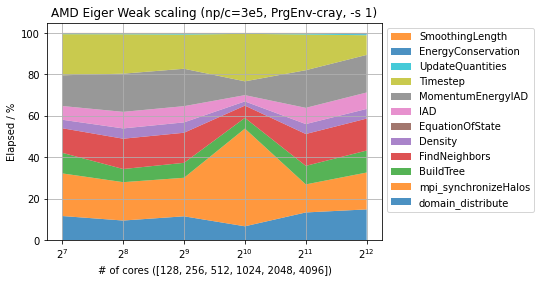

In [36]:
# matplotlib: area (= stackplot)
import matplotlib.pyplot as plt
# compute percentages
# tmpdf_cce_sph
tmpdf_compiler1_sph_pct = tmpdf_compiler1_sph.divide(tmpdf_compiler1_sph.sum(axis=1), axis=0)
tmpdf_compiler1_sph_pct *= 100

# tmpdf_cce_sph
# print(tmpdf3['mpi'])
# plt.stackplot(tmpdf3.index,
# plt.stackplot(tmpdf_cce_mpi, list(tmpdf_cce_sph), 
#               labels = ['domain_distribute', 'mpi_synchronizeHalos', 'BuildTree', 'FindNeighbors', 'Density', 'EquationOfState', 'IAD', 
# 'MomentumEnergyIAD', 'Timestep', 'UpdateQuantities', 'EnergyConservation', 'SmoothingLength'], alpha=0.8)
fig, ax = plt.subplots()
# ax.set_xticklabels(labels_l)
ax.set_xscale('log', base=2)
# ax.set_yscale('log', base=2)
# ax.set_xlabel(f'# of cores ([{min(tmpdf_cce_mpi)}:{max(tmpdf_cce_mpi)}])')
ax.set_xlabel(f'# of cores ({list(tmpdf_compiler1_mpi)})')
# ax.set_xticks(tmpdf_cce_mpi) # [128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768]
ax.set_ylabel('Elapsed / %')
ax.set_title(f'AMD Eiger Weak scaling (np/c={np_per_c}, {PE}, -s 1)')

labels_l = list(tmpdf_compiler1_sph.keys())
plt.stackplot(tmpdf_compiler1_mpi,
     [tmpdf_compiler1_sph_pct['domain_distribute'],
      tmpdf_compiler1_sph_pct['mpi_synchronizeHalos'],
      tmpdf_compiler1_sph_pct['BuildTree'],
      tmpdf_compiler1_sph_pct['FindNeighbors'],
      tmpdf_compiler1_sph_pct['Density'],
      tmpdf_compiler1_sph_pct['EquationOfState'],
      tmpdf_compiler1_sph_pct['IAD'],
      tmpdf_compiler1_sph_pct['MomentumEnergyIAD'],
      tmpdf_compiler1_sph_pct['Timestep'],
      tmpdf_compiler1_sph_pct['UpdateQuantities'],
      tmpdf_compiler1_sph_pct['EnergyConservation'],
      tmpdf_compiler1_sph_pct['SmoothingLength'],
     ],
#     [tmpdf_cce_sph['domain_distribute'],
#      tmpdf_cce_sph['mpi_synchronizeHalos'],
#      tmpdf_cce_sph['BuildTree'],
#      tmpdf_cce_sph['FindNeighbors'],
#      tmpdf_cce_sph['Density'],
#      tmpdf_cce_sph['EquationOfState'],
#      tmpdf_cce_sph['IAD'],
#      tmpdf_cce_sph['MomentumEnergyIAD'],
#      tmpdf_cce_sph['Timestep'],
#      tmpdf_cce_sph['UpdateQuantities'],
#      tmpdf_cce_sph['EnergyConservation'],
#      tmpdf_cce_sph['SmoothingLength'],
#     ],
     labels = labels_l,
     # labels = ['domain_distribute', 'mpi_synchronizeHalos'],
     alpha=0.8)

plt.grid()
# plt.legend(loc=2, fontsize='large')
leg_handles, leg_labels = ax.get_legend_handles_labels()
plt.legend(reversed(leg_handles), reversed(leg_labels), bbox_to_anchor=(1.0, 1.0), loc='upper left')
# plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
#screenshot instead: plt.savefig('gnu.pdf')
plt.show()

# Cray Perftools (data)

In [70]:
mpiL = [] ;ompL = [] ;sideL = [] ;stepL = [] ;commitL = [] ;peL = []
elapsedL = [] ;user_pctL = [] ;mpi_pctL = [] ;etc_pctL = [] ;

for job in range(len(dd)):
    name = dd[job]['name'].split('_')
    mpiL.append(int(name[3].replace('mpi', '')))
    ompL.append(int(name[4].replace('omp', '')))
    sideL.append(int(name[5].replace('n', '')))
    stepL.append(int(name[6].replace('steps', '')))
    commitL.append('#')
    pe = dd[job]['environment']
    peL.append(pe)
    # {'name': '_Elapsed', 'reference': 0, 'thres_lower': None, 'thres_upper': None, 'unit': 's', 'value': 8}
    #19 patrun_cn
    #22 %patrun_user
    #23 %patrun_mpi
    #24 %patrun_etc
    if dd[job]['outputdir'] is None:
        # failed = no perfvars
        elapsedL.append(0)
        user_pctL.append(0)
        mpi_pctL.append(0)
        etc_pctL.append(0)
    else:        
        for metric in range(len(dd[job]['perfvars'])):
            if dd[job]['perfvars'][metric]['name'] == 'Elapsed': elapsedL.append(dd[job]['perfvars'][metric]['value'])
            if dd[job]['perfvars'][metric]['name'] == '%patrun_user': user_pctL.append(dd[job]['perfvars'][metric]['value'])
            if dd[job]['perfvars'][metric]['name'] == '%patrun_mpi': mpi_pctL.append(dd[job]['perfvars'][metric]['value'])
            if dd[job]['perfvars'][metric]['name'] == '%patrun_etc': etc_pctL.append(dd[job]['perfvars'][metric]['value'])
            # if dd[job]['perfvars'][metric]['name'] == 'SmoothingLength': lL.append(dd[job]['perfvars'][metric]['value'])
            
df_dict = {'mpi': mpiL, 'openmp': ompL, 'cubeside': sideL, 'steps': stepL,
           'gitcommit': commitL, 'pe': peL, 'elapsed': elapsedL,
           '%usr': user_pctL, '%mpi': mpi_pctL, '%etc': etc_pctL,
           }
df_dict_keys = df_dict.keys()
print("keys=", df_dict.keys())
# df = df.drop(['domain_distribute'], axis=1)
df = pd.DataFrame(df_dict, columns = df_dict_keys)
print("df=", df)

np_per_c = '3e5'
PE = 'PrgEnv-cray'
tmpdf_compiler1 = df[df['pe'].isin([PE])]
tmpdf_compiler1_mpi = tmpdf_compiler1['mpi']
print(f'\ntmpdf={tmpdf_compiler1_mpi}')

keys= dict_keys(['mpi', 'openmp', 'cubeside', 'steps', 'gitcommit', 'pe', 'elapsed', '%usr', '%mpi', '%etc'])
df=      mpi  openmp  cubeside  steps gitcommit           pe  elapsed  %usr  %mpi  \
0    128       1       337      1         #  PrgEnv-cray  16.1715  54.4  35.2   
1    128       1       337      1         #   PrgEnv-gnu  16.3373  63.0  26.4   
2    256       1       425      1         #  PrgEnv-cray  14.9308  56.5  35.2   
3    256       1       425      1         #   PrgEnv-gnu  12.0362  74.8  15.2   
4    512       1       535      1         #  PrgEnv-cray  14.1303  54.4  36.7   
5    512       1       535      1         #   PrgEnv-gnu  14.4361  58.0  33.1   
6   1024       1       674      1         #  PrgEnv-cray  33.9516  23.9  71.5   
7   1024       1       674      1         #   PrgEnv-gnu  38.4329  24.0  71.9   
8   2048       1       850      1         #  PrgEnv-cray  14.5999  40.5  53.5   
9   2048       1       850      1         #   PrgEnv-gnu  15.9600  41.7  52.

In [86]:
# PE = 'PrgEnv-cray'
PE = 'PrgEnv-gnu'
PE

'PrgEnv-gnu'

# Cray Perftools (plot)

In [71]:
# tmpdf_compiler1_mpi
print(f'user={user_pctL} \nmpi={mpi_pctL} \nelse={etc_pctL}')


user=[54.4, 63.0, 56.5, 74.8, 54.4, 58.0, 23.9, 24.0, 40.5, 41.7, 38.3, 38.3] 
mpi=[35.2, 26.4, 35.2, 15.2, 36.7, 33.1, 71.5, 71.9, 53.5, 52.7, 56.2, 56.6] 
else=[10.4, 10.6, 8.4, 10.1, 8.9, 8.9, 4.6, 4.2, 6.0, 5.6, 5.5, 5.1]


In [87]:
df[df['pe'].isin([PE])]

,mpi,openmp,cubeside,steps,gitcommit,pe,elapsed,%usr,%mpi,%etc
1,128,1,337,1,#,PrgEnv-gnu,16.3373,63.0,26.4,10.6
3,256,1,425,1,#,PrgEnv-gnu,12.0362,74.8,15.2,10.1
5,512,1,535,1,#,PrgEnv-gnu,14.4361,58.0,33.1,8.9
7,1024,1,674,1,#,PrgEnv-gnu,38.4329,24.0,71.9,4.2
9,2048,1,850,1,#,PrgEnv-gnu,15.9600,41.7,52.7,5.6
11,4096,1,1071,1,#,PrgEnv-gnu,17.1206,38.3,56.6,5.1


In [88]:
df[df['pe'].isin([PE])]['mpi']

1      128
3      256
5      512
7     1024
9     2048
11    4096
Name: mpi, dtype: int64

In [89]:
# tmpdf_compiler1_mpi
user_pctL[::2]

[54.4, 56.5, 54.4, 23.9, 40.5, 38.3]

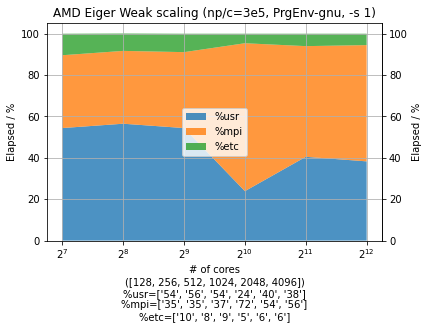

In [90]:
# matplotlib: area (= stackplot)
import matplotlib.pyplot as plt

tmpdf_mpi = df[df['pe'].isin([PE])]['mpi']
fig, ax = plt.subplots()
# ax.set_xticklabels(labels_l)
ax.set_xscale('log', base=2)
# ax.set_yscale('log', base=2)
# ax.set_xlabel(f'# of cores ([{min(tmpdf_cce_mpi)}:{max(tmpdf_cce_mpi)}])')
mL_round = [ '%.0f' % x for x in user_pctL[::2] ]
nL_round = [ '%.0f' % x for x in mpi_pctL[::2] ]
etcL_round = [ '%.0f' % x for x in etc_pctL[::2] ]
ax.set_xlabel(f'# of cores\n({list(tmpdf_mpi)})\n%usr={mL_round}\n%mpi={nL_round}\n%etc={etcL_round}')
# ax.set_xlabel(f'# of cores ({list(tmpdf_cce_mpi)})')
# ax.set_xticks(tmpdf_cce_mpi) # [128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768]
ax.set_ylabel('Elapsed / %')
ax.set_title(f'AMD Eiger Weak scaling (np/c={np_per_c}, {PE}, -s 1)')
# labels_l = list(tmpdf_cce_sph.keys())
# labels_l = ['%scorep_USR', '%scorep_MPI', '%scorep_ETC']
labels_l = ['%usr', '%mpi', '%etc']
plt.stackplot(tmpdf_compiler1_mpi,
     [user_pctL[::2], mpi_pctL[::2], etc_pctL[::2]],
     labels = labels_l,
     # labels = ['domain_distribute', 'mpi_synchronizeHalos'],
     alpha=0.8)

plt.grid()
# plt.legend(loc=2, fontsize='large')
# leg_handles, leg_labels = ax.get_legend_handles_labels()
# plt.legend(reversed(leg_handles), reversed(leg_labels), bbox_to_anchor=(1.0, 1.0), loc='upper left')
# plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.legend(loc='center')
    #best
	#upper right
	#upper left
	#lower left
	#lower right
	#right
	#center left
	#center right
	#lower center
	#upper center
	#center
# plt.savefig('mpi.jpg')

secaxy = ax.secondary_yaxis('right')
secaxy.set_ylabel('Elapsed / %')
plt.show()

# Score-P

In [33]:
# scorep: 20 %scorep_USR / 21 %scorep_MPI
# --> %etc = 100 - %usr - %mpi
etcL = []
for i in range(len(mL)):
  etcL.append(100 - mL[i] - nL[i])

print(mL, nL, etcL)

[38.4, 36.9, 28.0, 12.8, 14.8, 14.5, 13.8, 9.7, 9.3, 3.8] [35.0, 39.5, 51.5, 76.2, 72.5, 69.7, 69.2, 76.6, 76.6, 90.0] [26.6, 23.6, 20.5, 11.0, 12.700000000000003, 15.799999999999997, 17.0, 13.700000000000003, 14.100000000000009, 6.200000000000003]


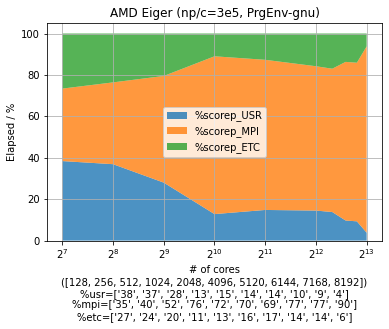

In [54]:
# matplotlib: area (= stackplot)
import matplotlib.pyplot as plt

tmpdf_mpi = df[df['pe'].isin([PE])]['mpi']
fig, ax = plt.subplots()
# ax.set_xticklabels(labels_l)
ax.set_xscale('log', base=2)
# ax.set_yscale('log', base=2)
# ax.set_xlabel(f'# of cores ([{min(tmpdf_cce_mpi)}:{max(tmpdf_cce_mpi)}])')

mL_round = [ '%.0f' % x for x in mL ]
nL_round = [ '%.0f' % x for x in nL ]
etcL_round = [ '%.0f' % x for x in etcL ]
ax.set_xlabel(f'# of cores\n({list(tmpdf_mpi)})\n%usr={mL_round}\n%mpi={nL_round}\n%etc={etcL_round}')
# ax.set_xlabel(f'# of cores ({list(tmpdf_cce_mpi)})')

# ax.set_xticks(tmpdf_cce_mpi) # [128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768]
ax.set_ylabel('Elapsed / %')
ax.set_title(f'AMD Eiger (np/c={np_per_c}, {PE})')

# labels_l = list(tmpdf_cce_sph.keys())
labels_l = ['%scorep_USR', '%scorep_MPI', '%scorep_ETC']
plt.stackplot(tmpdf_cce_mpi,
     [mL, nL, etcL],   
     labels = labels_l,
     # labels = ['domain_distribute', 'mpi_synchronizeHalos'],
     alpha=0.8)

plt.grid()
# plt.legend(loc=2, fontsize='large')
# leg_handles, leg_labels = ax.get_legend_handles_labels()
# plt.legend(reversed(leg_handles), reversed(leg_labels), bbox_to_anchor=(1.0, 1.0), loc='upper left')
# plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.legend(loc='center')
    #best
	#upper right
	#upper left
	#lower left
	#lower right
	#right
	#center left
	#center right
	#lower center
	#upper center
	#center
plt.savefig('mpi.jpg')
plt.show()


# Weak scaling

In [21]:
# PE = 'PrgEnv-cray'
df[df['pe'].isin([PE])][['mpi', 'elapsed']]

,mpi,elapsed
0,128,8.5476
1,256,7.5289
2,512,8.5220
3,1024,21.7033
4,2048,13.4176
5,4096,10.9193
6,5120,11.2996
7,6144,17.0042
8,7168,24.1562
9,8192,98.4125


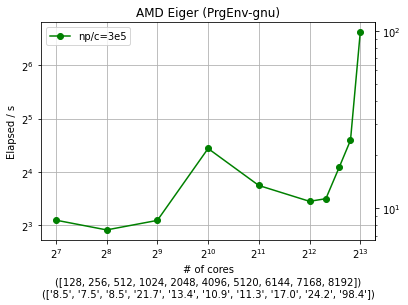

In [48]:
# weak scaling:
fig, ax = plt.subplots()
# ax.set_xticklabels(labels_l)
ax.set_xscale('log', base=2)
ax.set_yscale('log', base=2)

if False:
  np_per_c = '1e5'
  tmpdf_mpi = df[df['pe'].isin([PE])][0::3]['mpi']
  tmpdf_elapsed = df[df['pe'].isin([PE])][0::3]['elapsed']
  ax.plot(tmpdf_mpi, tmpdf_elapsed, 'ro-', label=f'np/c={np_per_c}')

  np_per_c = '2e5'
  tmpdf_mpi = df[df['pe'].isin([PE])][1::3]['mpi']
  tmpdf_elapsed = df[df['pe'].isin([PE])][1::3]['elapsed']
  ax.plot(tmpdf_mpi, tmpdf_elapsed, 'bo-', label=f'np/c={np_per_c}')

  np_per_c = '3e5'
  tmpdf_mpi = df[df['pe'].isin([PE])][2::3]['mpi']
  tmpdf_elapsed = df[df['pe'].isin([PE])][2::3]['elapsed']
  ax.plot(tmpdf_mpi, tmpdf_elapsed, 'go-', label=f'np/c={np_per_c}')

np_per_c = '3e5'
tmpdf_mpi = df[df['pe'].isin([PE])]['mpi']
tmpdf_elapsed = df[df['pe'].isin([PE])]['elapsed']
ax.plot(tmpdf_mpi, tmpdf_elapsed, 'go-', label=f'np/c={np_per_c}')

# ax.set_xlabel(f'# of cores ([{min(tmpdf_mpi)}:{max(tmpdf_mpi)}])')
tmpdf_elapsed_round = [ '%.1f' % x for x in tmpdf_elapsed ]
ax.set_xlabel(f'# of cores\n({list(tmpdf_mpi)})\n({list(tmpdf_elapsed_round)})')
# ax.set_xticks(tmpdf_mpi) # [128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768]
ax.set_ylabel('Elapsed / s')

ax2 = ax.secondary_yaxis('right')
# ax2.set_ylabel('Elapsed / s')

ax.set_title(f'AMD Eiger ({PE})')
plt.grid()
# plt.legend(bbox_to_anchor=(1.1, 1.0), loc='upper left')
plt.legend(loc='upper left')
plt.savefig('weak.jpg')
plt.show()

In [137]:
tmpdf_mpi

0     128
1     256
2     512
3    1024
4    2048
5    4096
6    5120
7    6144
8    7168
9    8192
Name: mpi, dtype: int64

# SANDBOX